In [21]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cols = ['estadoTeste', 'dataInicioSintomas', 'estado', 'dataEncerramento', 'sexo', 'profissionalSaude', 'dataNotificacao', 'condicoes', 'municipio', 'idade',  'evolucaoCaso', 'cbo', 'classificacaoFinal', 'dataNascimento', 'sintomas', 'resultadoTeste']

In [38]:
df = pd.read_csv(r'arquivos\estados\dados-sp.csv', sep=';', error_bad_lines=False, usecols=cols, encoding='ISO-8859-1')

D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


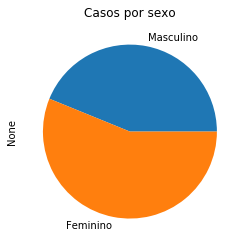

In [5]:
df.query('sexo != "Indefinido"').groupby('sexo').size().sort_values().plot(kind='pie', title='Casos por sexo')

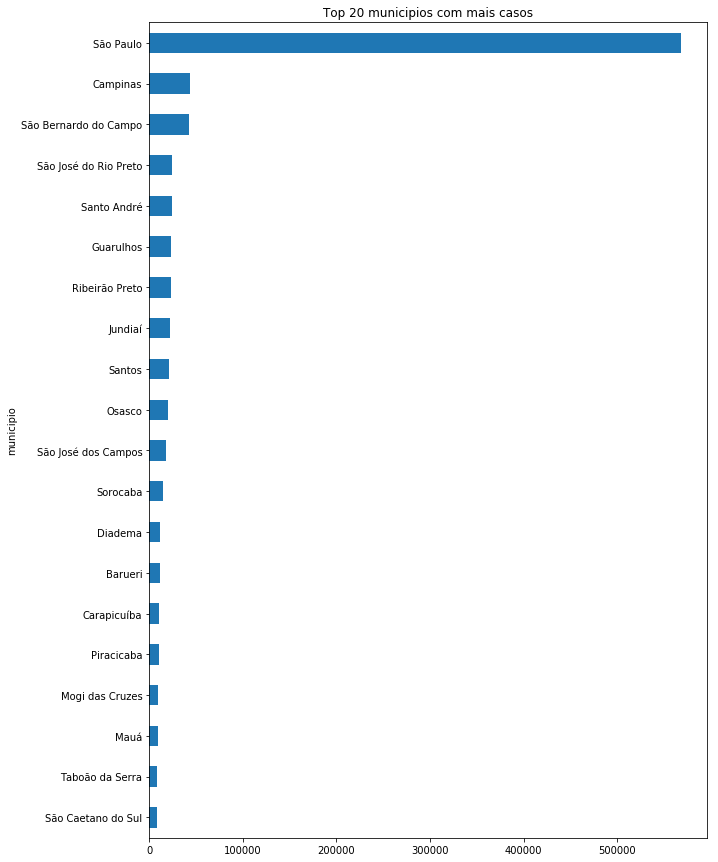

In [6]:
df.groupby('municipio').size().sort_values().tail(20).plot(kind='barh', figsize=(10,15), title='Top 20 municipios com mais casos')

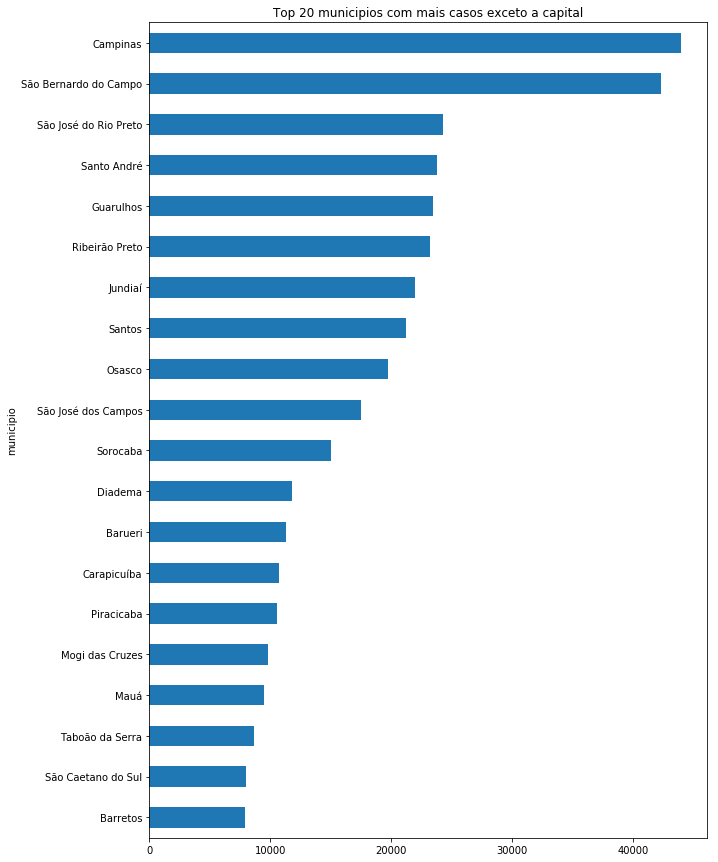

In [7]:
df.query('municipio != "São Paulo"').groupby('municipio').size().sort_values().tail(20).plot(kind='barh', figsize=(10,15), title='Top 20 municipios com mais casos exceto a capital')

In [8]:
prof_saude_positivo = df.query('profissionalSaude == "Sim" and resultadoTeste == "Positivo"').profissionalSaude.count()
f'Profissionais de saúde que testaram positivo: {prof_saude_positivo}'

'Profissionais de saúde que testaram positivo: 49950'

## Análise de datas

In [9]:
#Limpa os campos de data
df["dataInicioSintomas"] = df.query('dataInicioSintomas != "undefined"').dataInicioSintomas

In [10]:
df['dataInicioSintomas'] = pd.to_datetime(df['dataInicioSintomas'], errors='raise')
#Ignora datas que não são de 2020
dfDataAux = df[df['dataInicioSintomas'].dt.year == 2020.0]

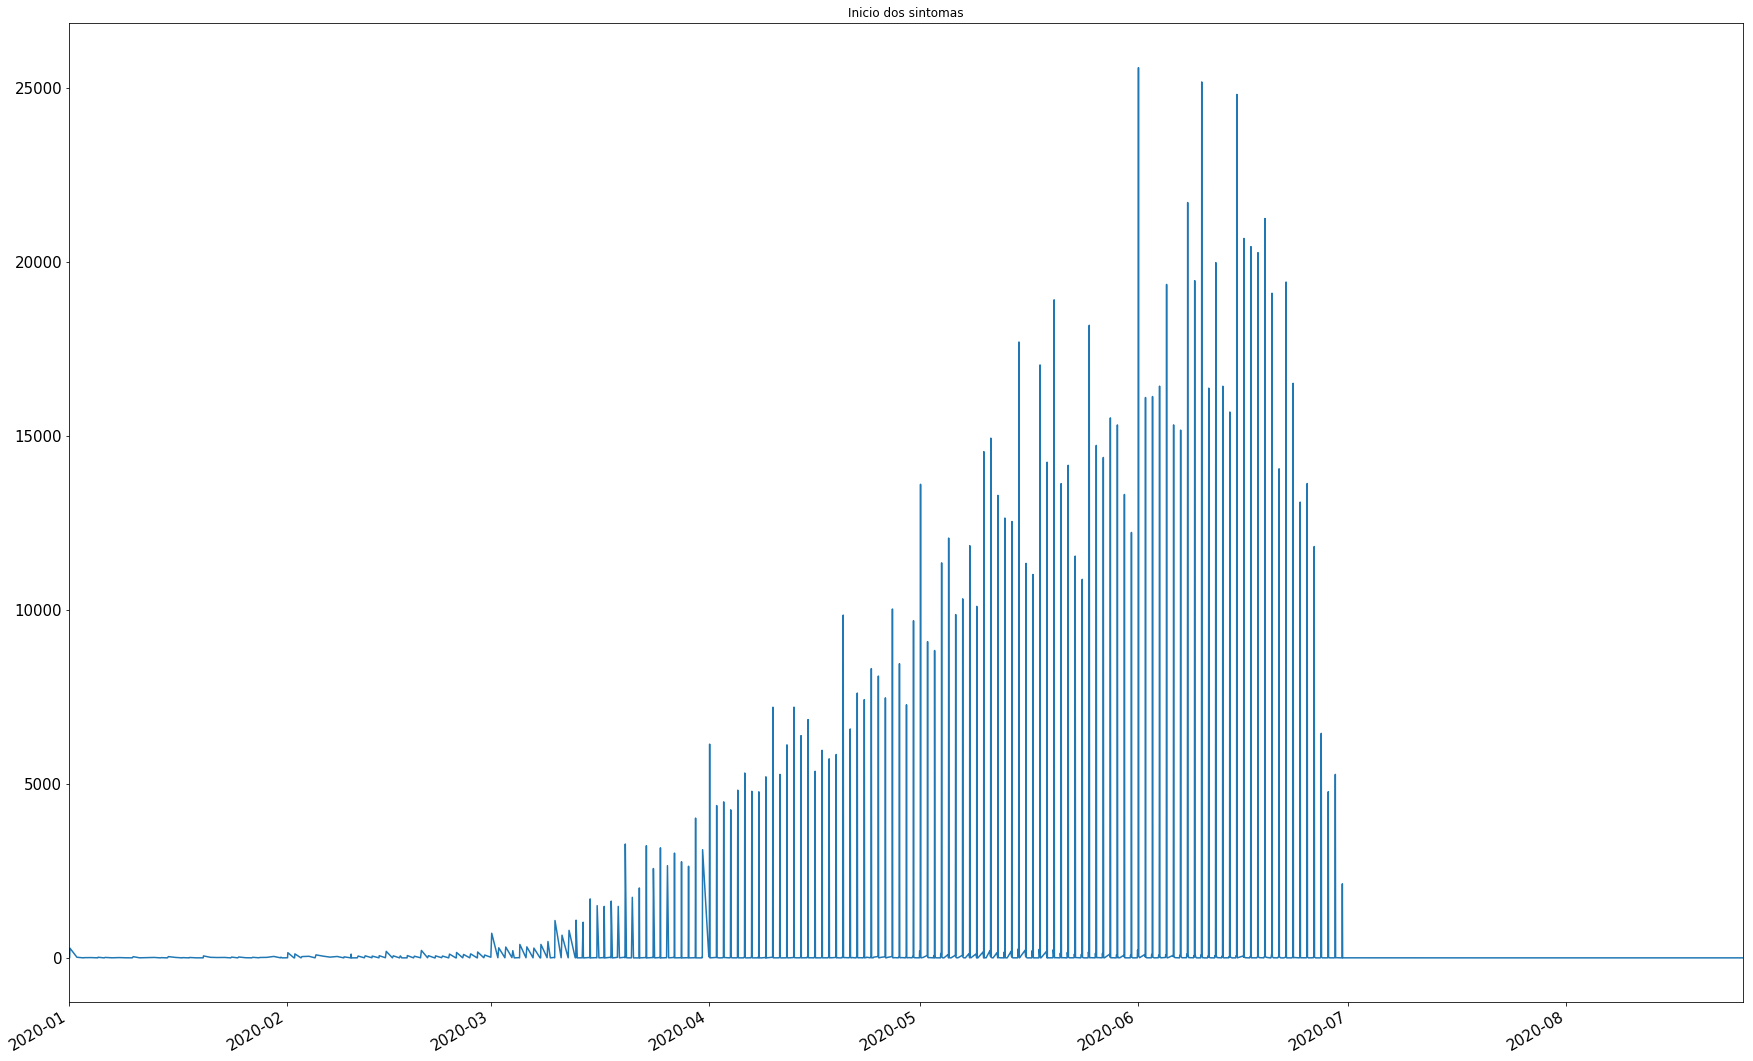

In [75]:
dfDataAux['dataInicioSintomas'].value_counts().sort_values().plot(kind='line', figsize=(30,20), fontsize=15, title='Inicio dos sintomas')

## Análise dos sintomas e condições prévias

In [12]:
df["sintomas"] = df.query('sintomas != "undefined"').sintomas

In [13]:
#Separa todos os sintomas 
lista_sintomas = df["sintomas"].str.split(",", expand=True)
lista_sintomas = lista_sintomas.fillna("")
lista_sintomas.reset_index(drop=True, inplace=True)
num_cols = max(lista_sintomas.count(axis='columns'))
todos_sintomas = []
for row in lista_sintomas.itertuples(index=False):
    for i in range(num_cols):
        if (row[i] != ''):
            todos_sintomas.append(row[i].strip())
            
df_sintomas = pd.DataFrame(todos_sintomas)

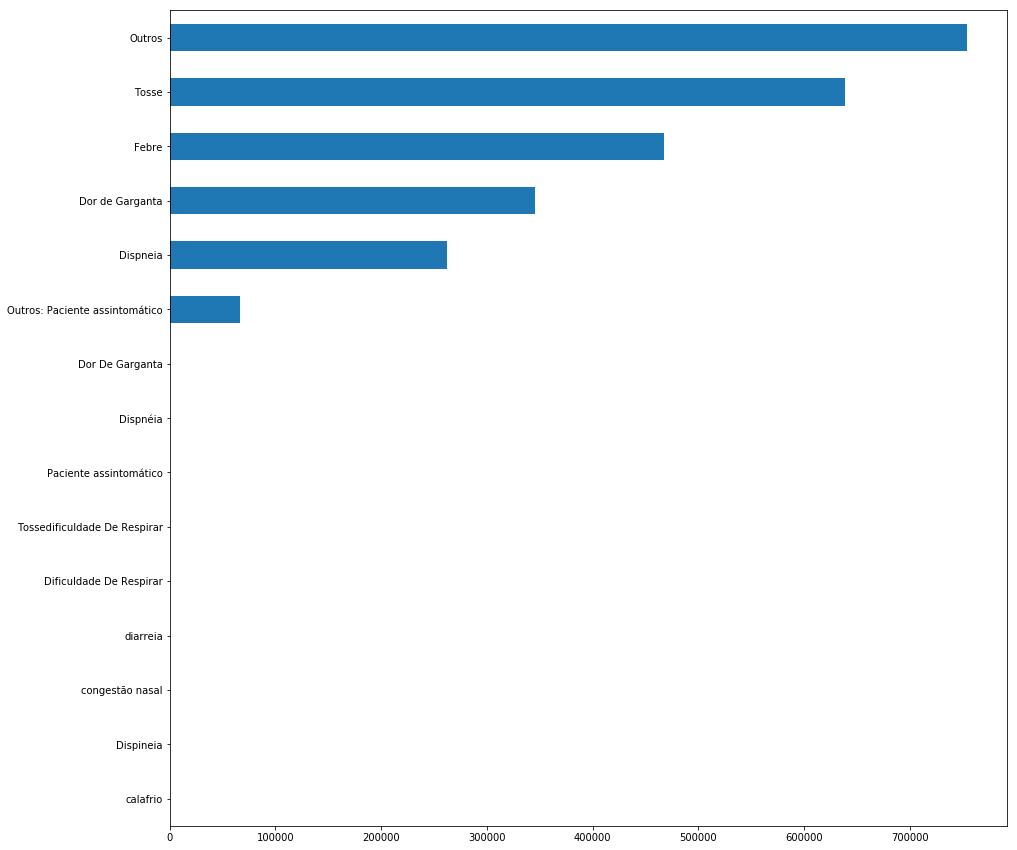

In [14]:
df_sintomas[0].value_counts().sort_values().tail(15).plot(kind='barh', figsize=(15,15))

In [15]:
#Separa todos as condições
lista_condicoes = df["condicoes"].str.split(",", expand=True)
lista_condicoes = lista_condicoes.fillna("")
lista_condicoes.reset_index(drop=True, inplace=True)
num_cols = max(lista_sintomas.count(axis='columns'))
todas_condicoes = []
for row in lista_condicoes.itertuples(index=False):
    for i in range(num_cols):
        if (row[i] != ''):
            todas_condicoes.append(row[i].strip())

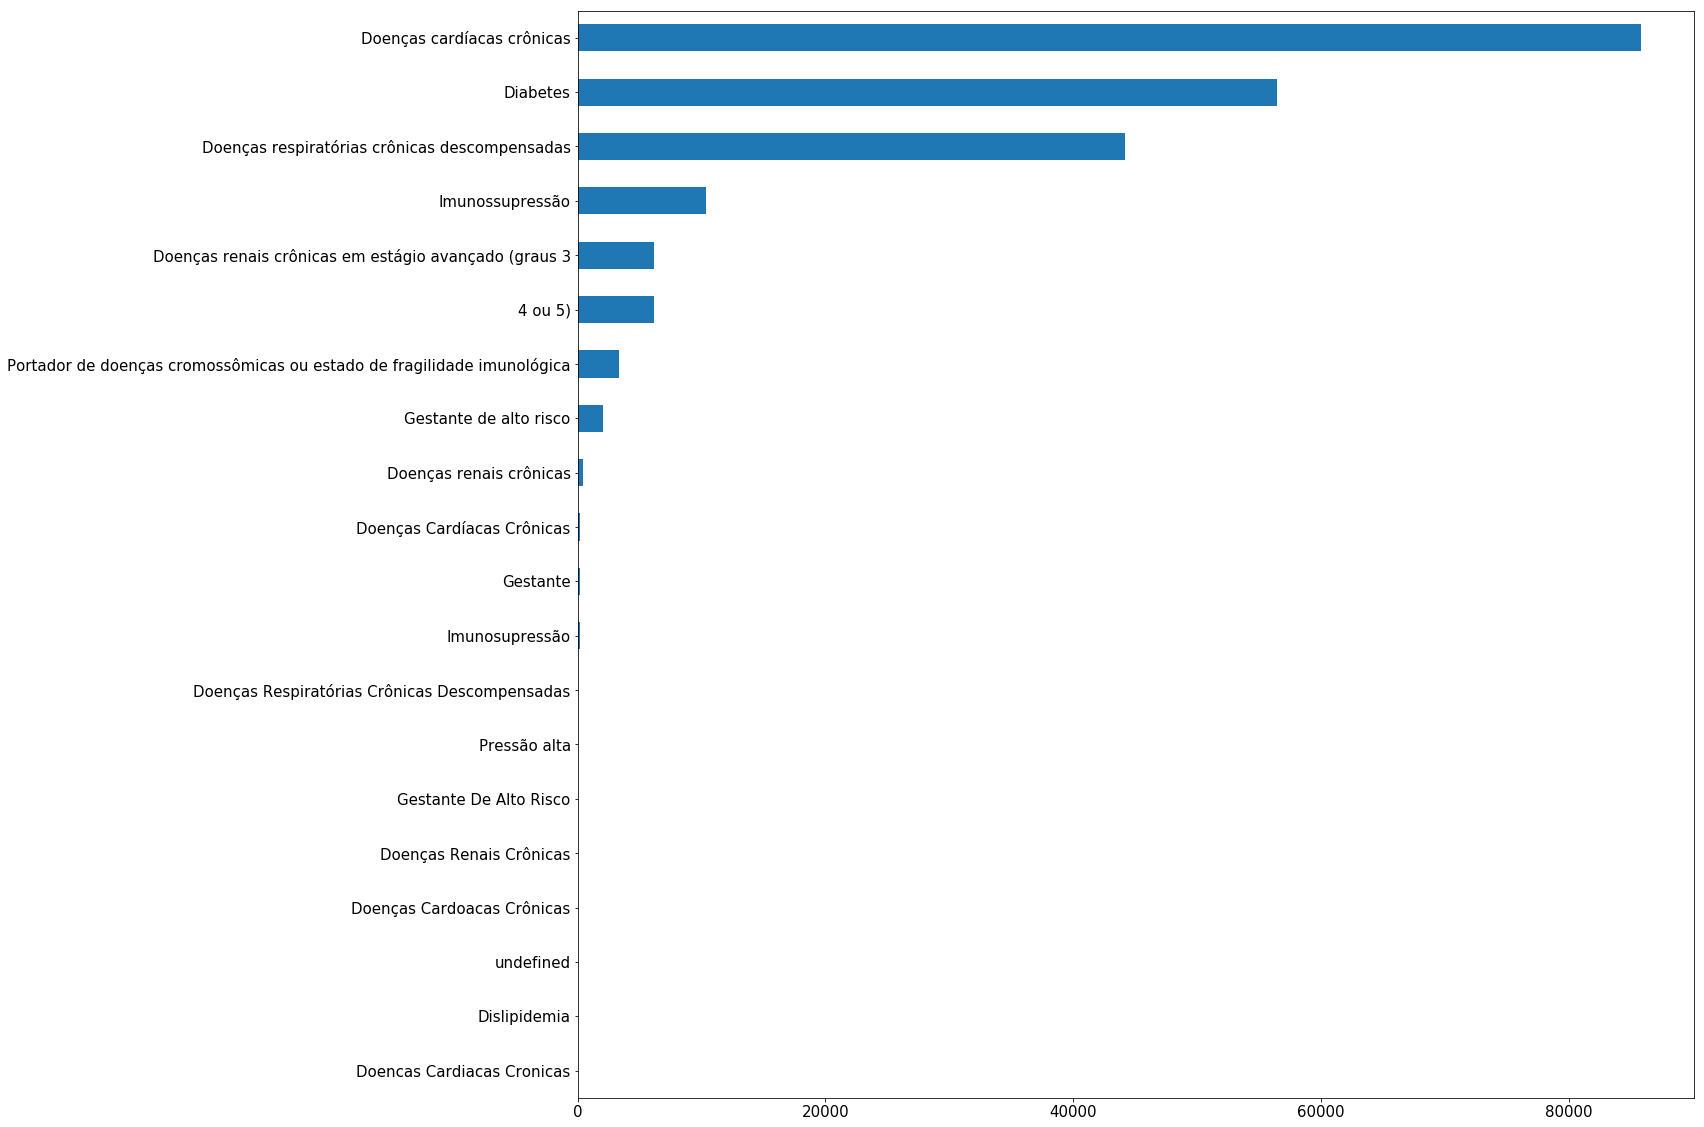

In [16]:
df_condicoes = pd.DataFrame(todas_condicoes)
df_condicoes[0].value_counts().sort_values().tail(20).plot(kind='barh', figsize=(20,20), fontsize=15)